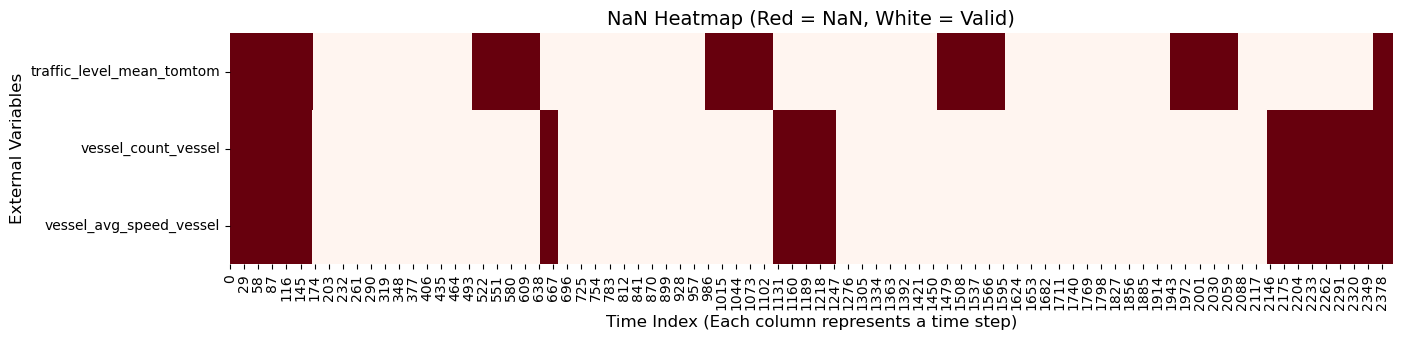

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(
    "C:/Users/elvinli/OneDrive/CodeProjects/TIL6022-Group23-SAIL-Dashboard/outputs_fast/training_dataset_tomtom_vessel.csv",
    parse_dates=["timestamp"]
)

# External variable columns to check for missing values
ext_cols = ["traffic_level_mean_tomtom", "vessel_count_vessel", "vessel_avg_speed_vessel"]

plt.figure(figsize=(15, 3))
sns.heatmap(df[ext_cols].isna().T, cmap="Reds", cbar=False)

plt.title("NaN Heatmap (Red = NaN, White = Valid)", fontsize=14)
plt.xlabel("Time Index (Each column represents a time step)", fontsize=12)
plt.ylabel("External Variables", fontsize=12)
plt.show()




In [ ]:
import pandas as pd
from pathlib import Path

in_path = Path("C:/Users/elvinli/OneDrive/CodeProjects/TIL6022-Group23-SAIL-Dashboard/outputs_fast/training_dataset_tomtom_vessel.csv")
out_path = Path("C:/Users/elvinli/OneDrive/CodeProjects/TIL6022-Group23-SAIL-Dashboard/outputs_fast/training_dataset_tomtom_vessel_ready.csv")

df = pd.read_csv(in_path, parse_dates=["timestamp"], low_memory=False)
print(f"File loaded: {in_path}")
print("Data Shape:", df.shape)

# ====== 2. Automatically detect external variable columns ======
exog_cols = [c for c in df.columns if any(k in c.lower() for k in ["tomtom", "vessel"])]

if not exog_cols:
    raise ValueError("No external variable columns detected. Please ensure that column names contain 'tomtom' or 'vessel'.")
else:
    print("Detected external variable columns:", exog_cols)

# ====== 3. Create missing-value indicator columns for each external variable ======
for col in exog_cols:
    new_col = f"{col}_isna"
    df[new_col] = df[col].isna().astype("int8")

print(f"Created missing-value indicator columns for {len(exog_cols)} external variables.")

# ====== 4. Save processed file ======
df.to_csv(out_path, index=False, float_format="%.6f")
print(f"File saved to: {out_path}")
print("Data Shape:", df.shape)

# ====== 5. Summarize missing-value ratios ======
print("\n Missing Value Summary:")
for col in exog_cols:
    miss_rate = df[col].isna().mean() * 100
    print(f" - {col}: missing rate = {miss_rate:.2f}%")


File loaded: C:\Users\elvinli\OneDrive\CodeProjects\TIL6022-Group23-SAIL-Dashboard\outputs_fast\training_dataset_tomtom_vessel.csv
Data Shape: (2400, 51)
Detected external variable columns: ['traffic_level_mean_tomtom', 'vessel_count_vessel', 'vessel_avg_speed_vessel']
Created missing-value indicator columns for 3 external variables.
File saved to: C:\Users\elvinli\OneDrive\CodeProjects\TIL6022-Group23-SAIL-Dashboard\outputs_fast\training_dataset_tomtom_vessel_ready.csv
Data Shape: (2400, 54)

 Missing Value Summary:
 - traffic_level_mean_tomtom: missing rate = 32.17%
 - vessel_count_vessel: missing rate = 24.92%
 - vessel_avg_speed_vessel: missing rate = 24.92%
